# GOM Displacements for Qoutayba

In [ ]:
#pip install lasso-python

In [1]:
import sys
import os
#py_file_location = "/content/drive/Othercomputers/Mein Laptop/MasterArbeit/Qoutayba"
#sys.path.append(os.path.abspath(py_file_location))
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
from scipy import interpolate
from gomxml_to_parquet import gomxml_to_parquet
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
from lasso.dyna import D3plot
import h5py

## Save GOM-XML to Parquet
uncomment if we need to re-convert XML to Parquets

In [ ]:
#gomxml_to_parquet(r"experiment/10mm/BAY65_TEN_3_00_0-01_041_Fields.xml", r"experiment/10mm/")
#gomxml_to_parquet(r"experiment/10mm/BAY65_TEN_3_00_0-01_041_Force_Displacement.xml", r"experiment/10mm/")
#gomxml_to_parquet(r"BAY65_TEN_3_00_0-01_041_True_Displacement/BAY65_TEN_3_00_0-01_041_Fields.xml", 
#                  r"BAY65_TEN_3_00_0-01_041_True_Displacement/")
#gomxml_to_parquet(r"BAY65_TEN_3_00_0-01_041_True_Displacement/BAY65_TEN_3_00_0-01_041_Force_Machine_Displacement.xml", 
#                  r"BAY65_TEN_3_00_0-01_041_True_Displacement/")

No metadata found at /content/drive/Othercomputers/Mein Laptop/MasterArbeit/Qoutayba/BAY65_TEN_3_00_0-01_041_True_Displacement_SKBK/metadata.json - skipping


In [ ]:
force1 = pd.read_parquet(r"experiment/10mm/BAY65_TEN_3_00_0-01_041_Force_Displacement.parquet")
force1 = force1.reset_index().astype(float)
force1 = force1.set_index("time")

In [ ]:
force1

,force,length
time,,
-0.4,0.000000,0.000000
0.0,48.667908,0.035210
0.2,113.338470,0.089645
0.4,183.135986,0.140877
0.6,244.609833,0.201702
...,...,...
35.0,1138.519287,9.829159
35.2,1138.519287,9.889984
35.4,1139.160156,9.938011


In [ ]:
force2 = pd.read_parquet(r"BAY65_TEN_3_00_0-01_041_True_Displacement/BAY65_TEN_3_00_0-01_041_Force_Machine_Displacement.parquet")
force2 = force2.reset_index().astype(float)
force2 = force2.set_index("time")

In [ ]:
force2

,force,length
time,,
-0.4,0.000000,0.000000
0.0,48.667908,0.035210
0.2,113.338470,0.089645
0.4,183.135986,0.140877
0.6,244.609833,0.201702
...,...,...
39.6,1142.360687,11.116219
39.8,1144.279480,11.173859
40.0,1144.920349,11.234684


In [ ]:
force3 = pd.read_parquet(r"BAY65_TEN_3_00_0-01_041_True_Displacement_SKBK/BAY65_TEN_3_00_0-01_041_Force_Machine_Displacement_with_SKBK.parquet")
force3 = force3.reset_index().astype(float)
force3 = force3.set_index("time")

In [ ]:
force3

,force,length
time,,
-0.4,0.000000,0.000000
0.0,48.667908,0.035210
0.2,113.338470,0.089645
0.4,183.135986,0.140877
0.6,244.609833,0.201702
...,...,...
39.6,1142.360687,11.116219
39.8,1144.279480,11.173859
40.0,1144.920349,11.234684


## Load Force-Displacement
Force = Measured force in N

Length = Measured global Displacement in mm

Text(0.5, 1.0, 'new Force2')

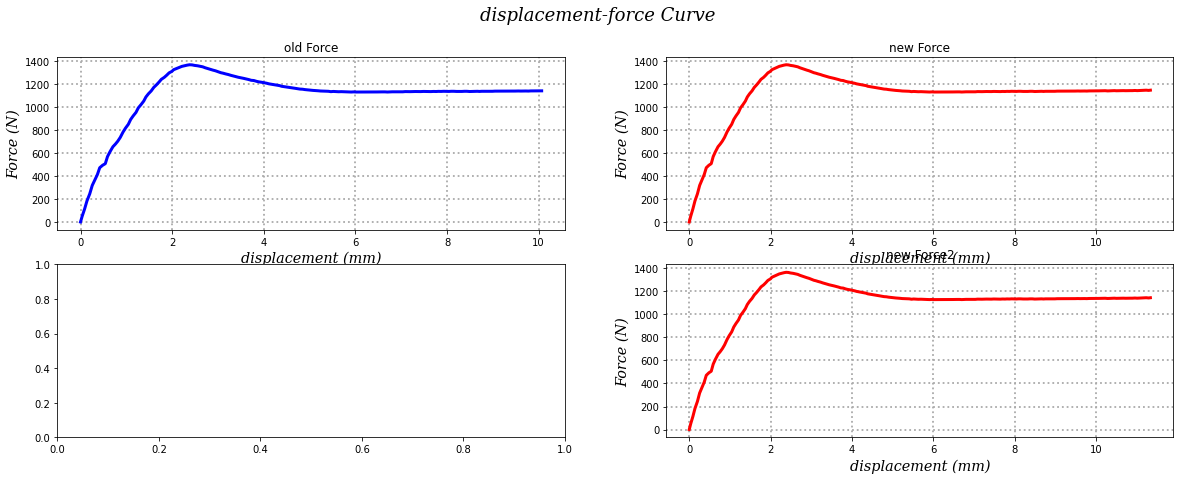

In [ ]:
#force.plot(x="length", y="force")
fig, axes = plt.subplots( 2,2,figsize=(20,7))    # In this example, all the plots will be in one figure. 
fig.suptitle('displacement-force Curve',family='serif', style='italic' ,fontsize=18)

x1 = force1.length
y1 = force1.force
x2 = force2.length
y2 = force2.force
x3 = force3.length
y3 = force3.force

axes[0,0].plot(x1,y1,linewidth=3,c='b')
axes[0,0].set_xlabel('displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
axes[0,0].set_ylabel('Force (N)',family='serif', style='italic' ,fontsize='x-large')
axes[0,0].grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[0,0].set_title('old Force')

axes[0,1].plot(x2,y2,linewidth=3,c='r')
axes[0,1].set_xlabel('displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
axes[0,1].set_ylabel('Force (N)',family='serif', style='italic' ,fontsize='x-large')
axes[0,1].grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[0,1].set_title('new Force')

axes[1,1].plot(x3,y3,linewidth=3,c='r')
axes[1,1].set_xlabel('displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
axes[1,1].set_ylabel('Force (N)',family='serif', style='italic' ,fontsize='x-large')
axes[1,1].grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[1,1].set_title('new Force2')

In [ ]:
timenew1 = np.arange(-0.4,35.8,36.2/101)
print(timenew1.shape)
timenew2 = np.arange(-0.4,40.4,40.8/101)
print(timenew2.shape)
timenew3 = np.arange(-0.4,40.4,40.8/101)
print(timenew3.shape)
#print(timenew)

(101,)
(101,)
(101,)


## Load Deformation Field and Visualize at one Timestep

In [ ]:
deformation1 = pd.read_parquet(r"experiment/10mm/BAY65_TEN_3_00_0-01_041_Fields.parquet")
deformation1 = deformation1.reset_index().astype("float")
deformation1 = deformation1.set_index(["time","ids"])

In [ ]:
deformation1
deformation1.head(2100)
# bis 2098 dann wechseln von time ( das bedeutet wir haben 2099 Punkt)

x         y         z  displacement_x  displacement_y  \
time ids                                                                     
-0.4 0.0     12.310790 -9.816312  0.027074        0.000000        0.000000   
     1.0     12.007444 -9.776751  0.026312        0.000000        0.000000   
     2.0     11.701936 -9.758355  0.024783        0.000000        0.000000   
     3.0     11.396261 -9.745487  0.021620        0.000000        0.000000   
     4.0     11.090765 -9.731715  0.021466        0.000000        0.000000   
...                ...       ...       ...             ...             ...   
     2096.0  12.559558  0.046812  0.003099        0.000000        0.000000   
     2097.0  12.267646  0.028143  0.002046        0.000000        0.000000   
     2098.0  11.982192  0.026871  0.002564        0.000000        0.000000   
 0.0 0.0     12.339486 -9.814865  0.027867        0.028695        0.001447   
     1.0     12.035958 -9.775086  0.027727        0.028513        0.001665   

             epsilon_xy  epsilon_y  epsilon_x  
time ids                                       
-0.4 0.0       0.000000   0.000000   0.000000  
     1.0       0.000000   0.000000   0.000000  
     2.0       0.000000   0.000000   0.000000  
     3.0       0.000000   0.000000   0.000000  
     4.0       0.000000   0.000000   0.000000  
...                 ...        ...        ...  
     2096.0    0.000000   0.000000   0.000000  
     2097.0    0.000000   0.000000   0.000000  
     2098.0    0.000000   0.000000   0.000000  
 0.0 0.0      -0.000370  -0.000341   0.000782  
     1.0      -0.000557  -0.000616   0.000770  

[2100 rows x 8 columns]

In [ ]:
deformation2 = pd.read_parquet(r"BAY65_TEN_3_00_0-01_041_True_Displacement/BAY65_TEN_3_00_0-01_041_Fields.parquet")
deformation2 = deformation2.reset_index().astype("float")
deformation2 = deformation2.set_index(["time","ids"])

In [ ]:
deformation2
#deformation2.head(1059)
# bis 1056 dann wechseln von time ( das bedeutet wir haben 1057 Punkt)

x          y         z  displacement_y  epsilon_x  \
time  ids                                                                 
-0.4  0.0     18.145693 -11.203278  0.053564        0.000000   0.000000   
      1.0     17.601746 -11.023996  0.050340        0.000000   0.000000   
      2.0     17.075337 -10.780679  0.047249        0.000000   0.000000   
      3.0     16.532195 -10.582116  0.043555        0.000000   0.000000   
      4.0     15.984158 -10.397810  0.042050        0.000000   0.000000   
...                 ...        ...       ...             ...        ...   
 40.4 1052.0  27.913777   1.042177  0.022537        0.037461   0.015154   
      1053.0  27.339676   0.919342  0.020992        0.038432   0.015501   
      1054.0  26.770647   0.826857  0.018936        0.039332   0.017083   
      1055.0  -8.694022   1.225224 -0.007247       -0.045577   0.013656   
      1056.0  28.380929   1.417063  0.023674        0.034494   0.013143   

              epsilon_xy  epsilon_y  displacement_x  
time  ids                                            
-0.4  0.0       0.000000   0.000000        0.000000  
      1.0       0.000000   0.000000        0.000000  
      2.0       0.000000   0.000000        0.000000  
      3.0       0.000000   0.000000        0.000000  
      4.0       0.000000   0.000000        0.000000  
...                  ...        ...             ...  
 40.4 1052.0    0.004630  -0.005312       10.726245  
      1053.0    0.004922  -0.005437       10.716012  
      1054.0    0.005423  -0.005814       10.706141  
      1055.0   -0.004938  -0.003857        0.678463  
      1056.0    0.004274  -0.004490       10.736712  

[215628 rows x 8 columns]

In [ ]:
deformation3 = pd.read_parquet(r"BAY65_TEN_3_00_0-01_041_True_Displacement_SKBK/BAY65_TEN_3_00_0-01_041_Fields_with_SKBK.parquet")
deformation3 = deformation3.reset_index().astype("float")
deformation3 = deformation3.set_index(["time","ids"])

In [ ]:
deformation3
#deformation2.head(1059)
# bis 1056 dann wechseln von time ( das bedeutet wir haben 1057 Punkt)

x          y         z  epsilon_x  displacement_x  \
time  ids                                                                 
-0.4  0.0     18.145693 -11.203278  0.053564   0.000000        0.000000   
      1.0     17.601746 -11.023996  0.050340   0.000000        0.000000   
      2.0     17.075337 -10.780679  0.047249   0.000000        0.000000   
      3.0     16.532195 -10.582116  0.043555   0.000000        0.000000   
      4.0     15.984158 -10.397810  0.042050   0.000000        0.000000   
...                 ...        ...       ...        ...             ...   
 40.4 1052.0  27.213906   1.022257  0.034946   0.015154       10.026374   
      1053.0  26.639719   0.899826  0.033286   0.015501       10.016055   
      1054.0  26.070625   0.807742  0.031134   0.017083       10.006119   
      1055.0  -9.393753   1.231039  0.002797   0.013656       -0.021269   
      1056.0  27.681321   1.396813  0.036346   0.013143       10.037105   

              epsilon_xy  epsilon_y  displacement_y  
time  ids                                            
-0.4  0.0       0.000000   0.000000        0.000000  
      1.0       0.000000   0.000000        0.000000  
      2.0       0.000000   0.000000        0.000000  
      3.0       0.000000   0.000000        0.000000  
      4.0       0.000000   0.000000        0.000000  
...                  ...        ...             ...  
 40.4 1052.0    0.004630  -0.005312        0.017541  
      1053.0    0.004922  -0.005437        0.018916  
      1054.0    0.005423  -0.005814        0.020217  
      1055.0   -0.004938  -0.003857       -0.039762  
      1056.0    0.004274  -0.004490        0.014245  

[215628 rows x 8 columns]

In [ ]:
timeindx = force3.index
x60coo  = np.array([])
x131coo = np.array([])
x60dis  = np.array([])
x131dis = np.array([])
y60dis  = np.array([])
y131dis = np.array([])
x25dis  = np.array([])
x94dis  = np.array([])
y25dis  = np.array([])
y94dis  = np.array([])
x622dis  = np.array([])
y622dis  = np.array([])
for i in timeindx:
    i = np.around(i, decimals=2, out=None)
    x60co   = deformation3.loc[i,60]["x"]
    x131co  = deformation3.loc[i,131]["x"]
    x60coo  = np.append(x60coo,x60co)
    x131coo = np.append(x131coo,x131co)
    x60di   = deformation3.loc[i,60]["displacement_x"]
    x131di  = deformation3.loc[i,131]["displacement_x"]
    x622di  = deformation3.loc[i,622]["displacement_x"]
    x60dis  = np.append(x60dis,x60di)
    x131dis = np.append(x131dis,x131di)
    x622dis = np.append(x622dis,x622di)
    y60di   = deformation3.loc[i,60]["displacement_y"]
    y131di  = deformation3.loc[i,131]["displacement_y"]
    y60dis  = np.append(y60dis,y60di)
    y131dis = np.append(y131dis,y131di)
    x25di   = deformation3.loc[i,25]["displacement_x"]
    x94di   = deformation3.loc[i,94]["displacement_x"]
    x25dis  = np.append(x25dis,x25di)
    x94dis  = np.append(x94dis,x94di)
    y25di   = deformation3.loc[i,25]["displacement_y"]
    y94di   = deformation3.loc[i,94]["displacement_y"]
    y25dis  = np.append(y25dis,y25di)
    y94dis  = np.append(y94dis,y94di)
    y622di  = deformation3.loc[i,622]["displacement_y"]
    y622dis = np.append(y622dis,y622di)
print(x60di)
print(x131di)
print(y60di)
print(y131di)
print(x25di)
print(x94di)
print(y25di)
print(y94di)
print(x60dis.shape)
#print(x131dis)

0.000454
10.021522
-0.001945
0.055972
4.53079
4.151529
1.138921
-1.06881
(204,)


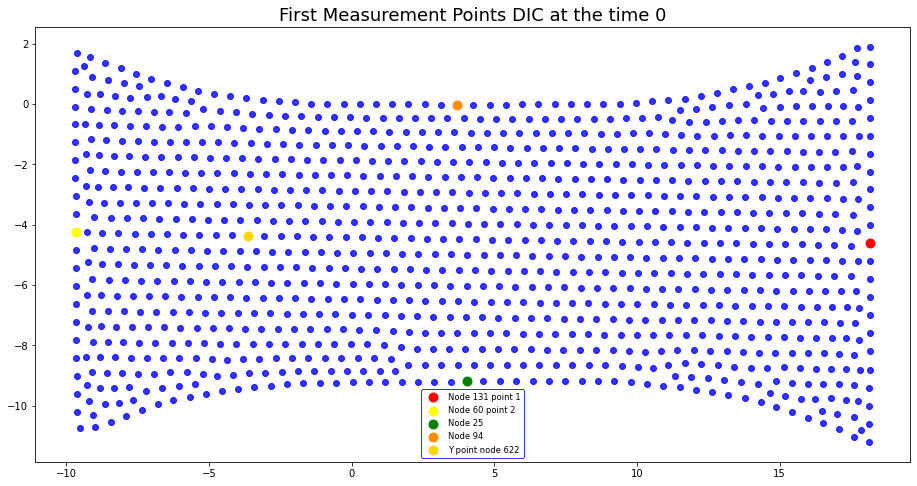

In [ ]:
#set time to visualize
time = -0.4
ids  = 0
#plot points of displacement measurement
fig, ax = plt.subplots(figsize = (18, 8))
# ...and plot location of original data points
#ax[0].scatter(deformation1.loc[[time]]["x"], deformation1.loc[[time]]["y"], c='b', alpha=0.8, marker='o')
#ax[0].set_title('First Measurement Points DIC at the time 0',fontsize=18)
ax.scatter(deformation3.loc[[time]]["x"], deformation3.loc[[time]]["y"], c='b', alpha=0.8, marker='o')
ax.scatter(deformation3.loc[time,131]["x"], deformation3.loc[time,131]["y"], c='r', alpha=1, marker='o',label='Node 131 point 1',s=80)
ax.scatter(deformation3.loc[time,60]["x"], deformation3.loc[time,60]["y"], c='yellow', alpha=1, marker='o',label='Node 60 point 2',s=80)
ax.scatter(deformation3.loc[time,25]["x"], deformation3.loc[time,25]["y"], c='g', alpha=1, marker='o',label='Node 25',s=80)
ax.scatter(deformation3.loc[time,94]["x"], deformation3.loc[time,94]["y"], c='darkorange', alpha=1, marker='o',label='Node 94',s=80)
ax.scatter(deformation3.loc[time,622]["x"], deformation3.loc[time,622]["y"], c='gold', alpha=1, marker='o',label='Y point node 622',s=80)
ax.set_title('First Measurement Points DIC at the time 0',fontsize=18)
ax.legend(edgecolor='blue' , fontsize='small')
#cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.subplots_adjust(right=0.8)

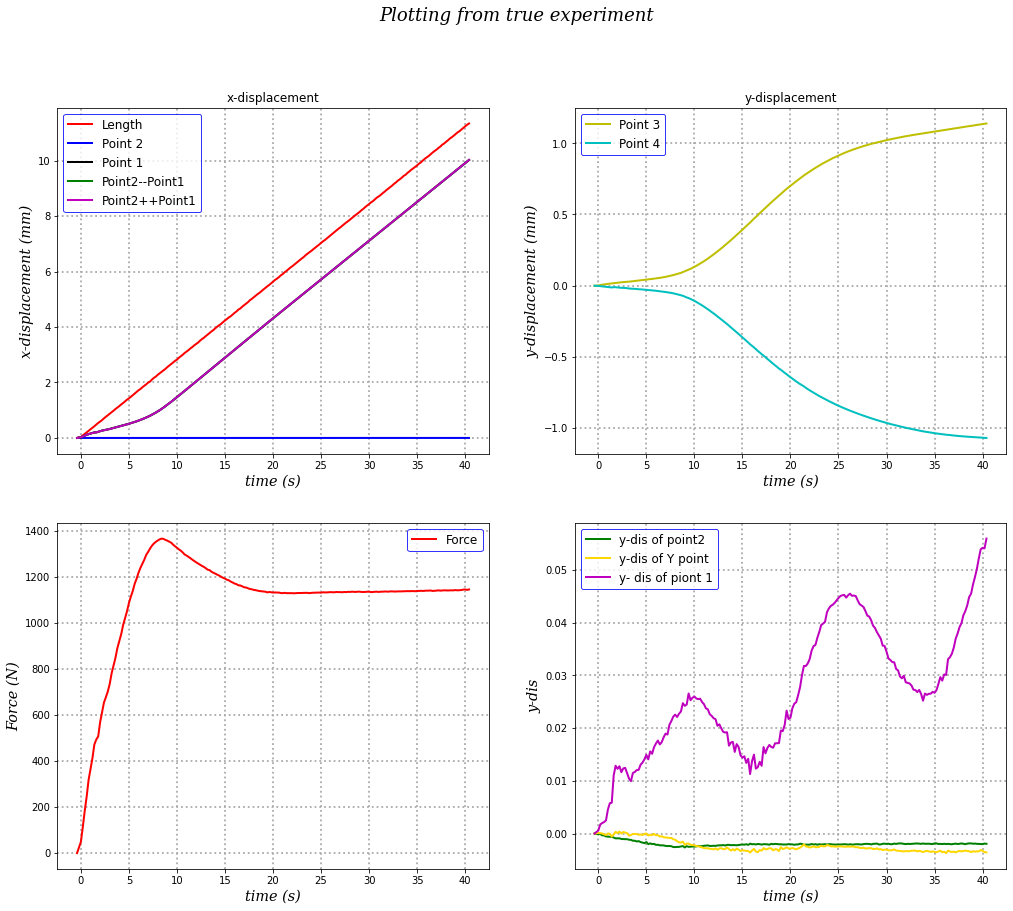

In [ ]:
#Plotting from true experiment
fig, axes = plt.subplots( 2,2,figsize=(17,14))    # In this example, all the plots will be in one figure. 
fig.suptitle('Plotting from true experiment',family='serif', style='italic' ,fontsize=18)

x = force3.index
force  = force3.force
length = force3.length
dif    = x131dis-x60dis
Add    = x131dis+x60dis
axes[0,0].plot(x,length,linewidth=2,c='r',label='Length')
axes[0,0].plot(x,x60dis,linewidth=2,c='b',label='Point 2')
axes[0,0].plot(x,x131dis,linewidth=2,c='k',label='Point 1')
axes[0,0].plot(x,dif,linewidth=2,c='g',label='Point2--Point1')
axes[0,0].plot(x,Add,linewidth=2,c='m',label='Point2++Point1')
axes[0,1].plot(x,y25dis,linewidth=2,c='y',label='Point 3')
axes[0,1].plot(x,y94dis,linewidth=2,c='c',label='Point 4')
axes[0,0].set_ylabel('x-displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
axes[0,0].set_xlabel('time (s)',family='serif', style='italic' ,fontsize='x-large')
axes[0,0].grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[0,0].set_title('x-displacement')
axes[0,0].legend(edgecolor='blue' , fontsize='large')
axes[0,1].set_ylabel('y-displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
axes[0,1].set_xlabel('time (s)',family='serif', style='italic' ,fontsize='x-large')
axes[0,1].grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[0,1].set_title('y-displacement')
axes[0,1].legend(edgecolor='blue' , fontsize='large')

axes[1,0].plot(x,force,linewidth=2,c='r', label='Force')
axes[1,0].set_xlabel('time (s)',family='serif', style='italic' ,fontsize='x-large')
axes[1,0].set_ylabel('Force (N)',family='serif', style='italic' ,fontsize='x-large')
axes[1,0].grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[1,0].legend(edgecolor='blue' , fontsize='large')
axes[1,1].plot(x,y60dis,linewidth=2,c='g', label='y-dis of point2')
axes[1,1].plot(x,y622dis,linewidth=2,c='gold', label='y-dis of Y point')
axes[1,1].plot(x,y131dis,linewidth=2,c='m', label='y- dis of piont 1')
axes[1,1].set_xlabel('time (s)',family='serif', style='italic' ,fontsize='x-large')
axes[1,1].set_ylabel('y-dis',family='serif', style='italic' ,fontsize='x-large')
axes[1,1].grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[1,1].legend(edgecolor='blue' , fontsize='large')
#axes[1].set_title('Force')

In [ ]:
h5file1 = h5py.File('Finally training Data/Vergleich101.h5', 'r' )                 #40 fäülle aus Simulationen mit 101 Zeitschritten
h5file2 = h5py.File('Finally training Data/Vergleich51.h5', 'r' )                  #200 fäülle aus Simulationen mit 51 Zeitschritten
Realdata1 = np.load('test_data2.npz.npy')
Realdata2 = np.load('test_data_daniel_Mirijam.npz.npy')
xyfornotscaled1 = np.array(h5file1['Training data not scaled/xyfornotscaled'])
label1 = np.array(h5file1['Training data not scaled/Labels'])
xyfornotscaled2 = np.array(h5file2['Training data not scaled/xyfornotscaled'])
label2 = np.array(h5file2['Training data not scaled/Labels'])
print(xyfornotscaled1.shape)
print(label1.shape)
h5file1.close()
print(xyfornotscaled2.shape)
print(label2.shape)
h5file2.close()
Realdata1[:,:,2] *= 0.001
Realdata2[:,:,2] *= 0.001
#Realdata1[:,:,2] /= 2.61
#Realdata2[:,:,2] /= 2.61
Realdata1 = np.tile(Realdata1,(5,1,1,1))
Realdata2 = np.tile(Realdata2,(5,1,1,1))
print(Realdata1.shape)
print(Realdata2.shape)

(40, 276, 101, 3)
(40, 6)
(20, 276, 51, 3)
(20, 6)
(5, 272, 101, 3)
(5, 272, 101, 3)


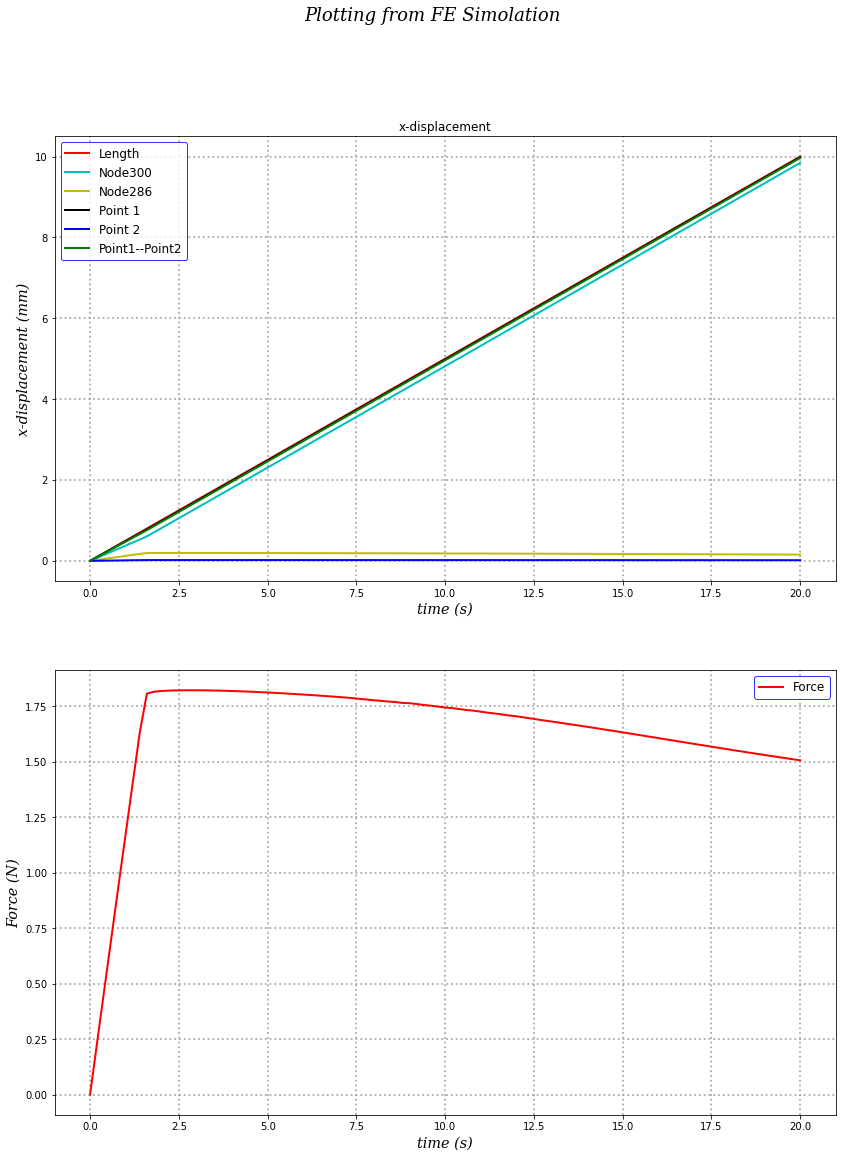

In [ ]:
#Plotting from FE Simolation
fig, axes = plt.subplots( 2,1,figsize=(14,18))    # In this example, all the plots will be in one figure. 
fig.suptitle('Plotting from FE Simolation',family='serif', style='italic' ,fontsize=18)

x = np.arange(0.0,20.2,0.2)
y1 = xyfornotscaled1[22,135,:,0]       # node 300 
y2 = xyfornotscaled1[22,121,:,0]       # node 286
y3 = xyfornotscaled1[22,156,:,0]       # node 346
y4 = xyfornotscaled1[22,138,:,0]       # node 318 ( must be close to 0)
force  = xyfornotscaled1[22,138,:,2]
length = np.arange(0.0,10.1,0.1)
dif    = y3-y4
axes[0].plot(x,length,linewidth=2,c='r',label='Length')
axes[0].plot(x,y1,linewidth=2,c='c',label='Node300')
axes[0].plot(x,y2,linewidth=2,c='y',label='Node286')
axes[0].plot(x,y3,linewidth=2,c='k',label='Point 1')
axes[0].plot(x,y4,linewidth=2,c='b',label='Point 2')
axes[0].plot(x,dif,linewidth=2,c='g',label='Point1--Point2')
axes[0].set_ylabel('x-displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
axes[0].set_xlabel('time (s)',family='serif', style='italic' ,fontsize='x-large')
axes[0].grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[0].set_title('x-displacement')
axes[0].legend(edgecolor='blue' , fontsize='large')

axes[1].plot(x,force,linewidth=2,c='r', label='Force')
axes[1].set_xlabel('time (s)',family='serif', style='italic' ,fontsize='x-large')
axes[1].set_ylabel('Force (N)',family='serif', style='italic' ,fontsize='x-large')
axes[1].grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[1].legend(edgecolor='blue' , fontsize='large')
#axes[1].set_title('Force')

## Import FE Coords

In [ ]:
d3plot = D3plot(r"onecaseImplicit20ms10mm0.2ms/d3plot") # your Specimen

In [ ]:
coords = d3plot.arrays["node_coordinates"]
print(coords.shape)
print(coords)

(624, 3)
[[-19.        0.        0.     ]
 [-17.97847   0.        0.     ]
 [-16.95694   0.        0.     ]
 ...
 [ 16.95695  15.        0.     ]
 [ 17.97849  15.        0.     ]
 [ 19.       15.        0.     ]]


In [ ]:
x_trim = 9 #Keep only Nodes with x-coordinate between -x_trim and x_trim 

trim_index = []
for i in range(0,coords.shape[0]):
    if abs(coords[i,0]) > x_trim:
        trim_index.append(i)
trimmedCoords = np.delete(coords,trim_index,0)
print(trimmedCoords.shape) #this should be the desired number of nodes (272)
coords = trimmedCoords #discard rest of the coords

(272, 3)


Text(0.5, 1.0, 'FEA Points (red) vs DIC Measurement (Blue)')

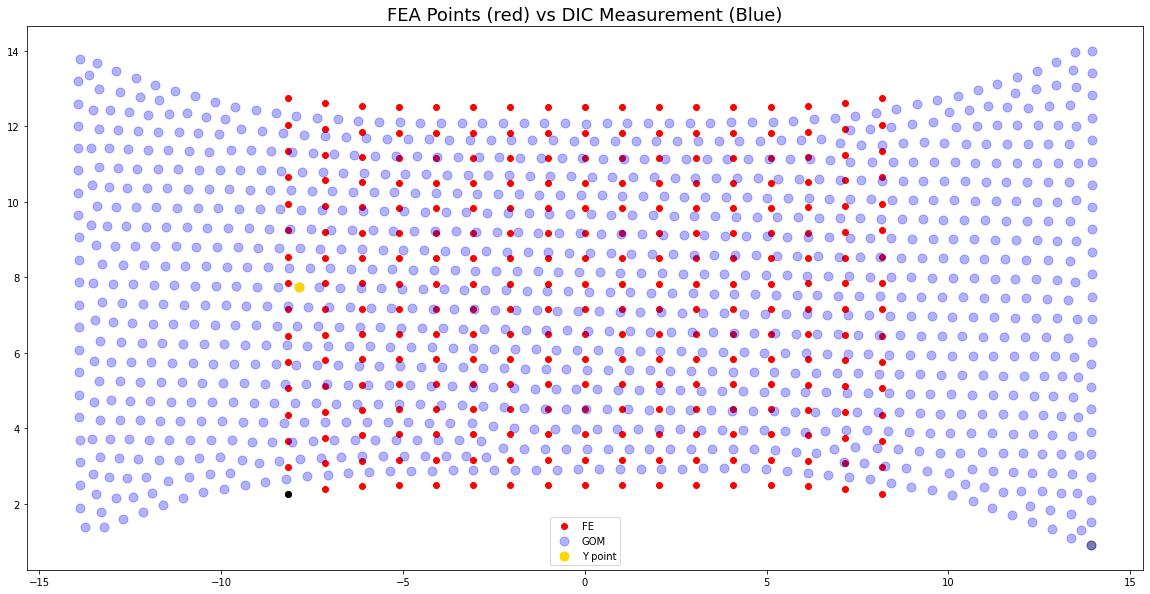

In [ ]:
time = 0
#plot
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (20, 10))
#define offset bewtween DIC and FEA coordinate systems
xoff = -4.25
yoff = 12.1
# ...and plot location of original data points
ax.scatter(coords[:,0] ,coords[:,1], c='r', alpha=1, marker='o',label='FE')
ax.scatter(coords[0,0] ,coords[0,1], c='k', alpha=1, marker='o')
ax.scatter(deformation3.loc[[time]]["x"]+xoff,deformation3.loc[[time]]["y"]+yoff, c='b', alpha=.3, marker='o',s=80,label='GOM')
ax.scatter(deformation3.loc[time,0]["x"]+xoff,deformation3.loc[time,0]["y"]+yoff, c='k', alpha=.3, marker='o',s=80)
ax.scatter(deformation3.loc[time,622]["x"]+xoff, deformation3.loc[time,622]["y"]+yoff, c='gold', alpha=1, marker='o',label='Y point',s=80)
ax.legend()
ax.set_title("FEA Points (red) vs DIC Measurement (Blue)",fontsize=18)

## Interpolate

(272,)


Text(0.5, 1.0, 'X')

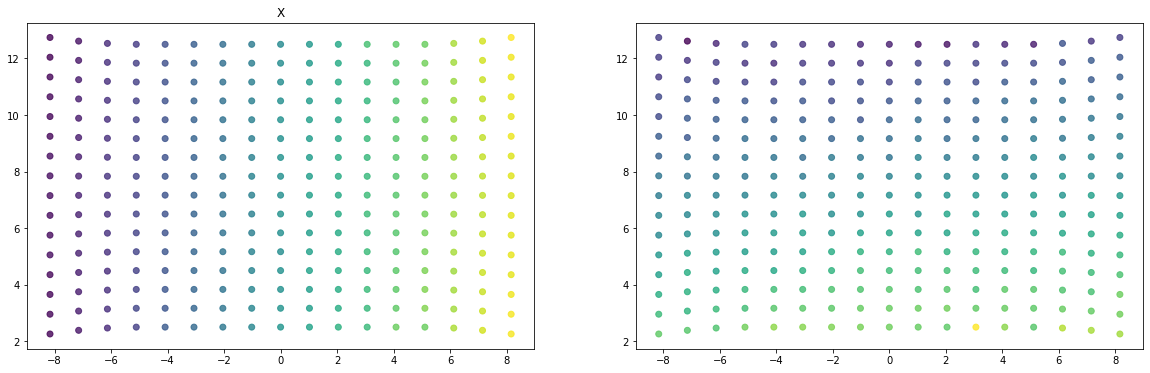

In [ ]:
#do the interpolation from DIC to FEA Nodes
dX_on_FEA = griddata((deformation3.loc[[0]]["x"]+xoff, deformation2.loc[[0]]["y"]+yoff),
                     deformation3.loc[[time]]["displacement_x"], (coords[:,0], coords[:,1]), method="cubic")
dY_on_FEA = griddata((deformation3.loc[[0]]["x"]+xoff, deformation3.loc[[0]]["y"]+yoff),
                     deformation3.loc[[time]]["displacement_y"], (coords[:,0], coords[:,1]), method="cubic")
#check shape
print(dX_on_FEA.shape) 
#print(dX_on_FEA)
#print(dY_on_FEA)

#plot interpolated result
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (20, 6))
ax[0].scatter(coords[:,0], coords[:,1], c=dX_on_FEA, alpha=.8, marker='o')
ax[1].scatter(coords[:,0], coords[:,1], c=dY_on_FEA, alpha=.8, marker='o')
ax[0].set_title("X")

In [ ]:
print(x60dis.shape)
print(x60dis)

(204,)
[ 0.000e+00  2.200e-05 -7.800e-05 -1.430e-04 -3.870e-04 -2.090e-04
 -1.920e-04 -2.700e-04 -8.800e-05 -2.510e-04 -1.910e-04 -2.000e-04
 -7.000e-06 -4.400e-04 -1.710e-04 -1.190e-04 -1.700e-05  1.500e-05
  2.700e-05  9.800e-05  2.560e-04  2.700e-04  2.430e-04  2.170e-04
  1.590e-04  4.380e-04  2.690e-04  2.240e-04  4.680e-04  3.980e-04
  6.350e-04  5.880e-04  5.680e-04  7.030e-04  7.100e-04  6.660e-04
  7.450e-04  8.680e-04  9.540e-04  9.610e-04  7.140e-04  8.780e-04
  9.680e-04  9.740e-04  9.150e-04  1.005e-03  8.980e-04  1.045e-03
  8.810e-04  9.490e-04  1.086e-03  8.990e-04  9.580e-04  1.088e-03
  9.450e-04  9.720e-04  1.006e-03  1.004e-03  1.151e-03  1.089e-03
  1.021e-03  9.940e-04  1.058e-03  1.109e-03  1.086e-03  1.003e-03
  1.008e-03  8.830e-04  1.088e-03  1.082e-03  9.480e-04  9.020e-04
  1.041e-03  9.640e-04  1.037e-03  1.119e-03  1.052e-03  1.049e-03
  1.058e-03  1.109e-03  1.263e-03  1.134e-03  1.118e-03  1.208e-03
  1.095e-03  1.056e-03  1.114e-03  1.285e-03  1.191e-03

# LOOP over all Timesteps

Now do it all in a loop, to compose final vector

In [ ]:
arrays = []
#i = 0
for time in tqdm(force3.index.astype(float)):
    if (deformation3.loc[[0]]["x"].shape != deformation3.loc[[time]]["displacement_x"].shape):
        continue
    dX_on_FEA = griddata((deformation3.loc[[0]]["x"]+xoff, deformation3.loc[[0]]["y"]+yoff),
                         deformation3.loc[[time]]["displacement_x"], (coords[:,0], coords[:,1]), method="cubic")
    dY_on_FEA = griddata((deformation3.loc[[0]]["x"]+xoff, deformation2.loc[[0]]["y"]+yoff),
                         deformation3.loc[[time]]["displacement_y"], (coords[:,0], coords[:,1]), method="cubic")
    #dX_on_FEA = dX_on_FEA - x60dis
    current_time_array = np.stack((dX_on_FEA,dY_on_FEA,np.repeat(force3["force"][time],dX_on_FEA.shape)),axis=-1)
    arrays.append(current_time_array)
#    i = i+1
final_array = np.dstack(arrays)
print(final_array.shape)
final_array = np.swapaxes(final_array,1,2)
print('final_array.shape')
print(final_array.shape)
print('final_array = ',final_array)

  0%|          | 0/204 [00:00<?, ?it/s]

(272, 3, 204)
final_array.shape
(272, 204, 3)
final_array =  [[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 3.93642949e-03  1.98467651e-03  4.86679080e+01]
  [ 8.87357957e-03  3.88514846e-03  1.13338470e+02]
  ...
  [ 8.01463857e-02  6.31091608e-02  1.14492035e+03]
  [ 7.89892998e-02  6.85685166e-02  1.14300156e+03]
  [ 7.66526833e-02  7.51442454e-02  1.14492035e+03]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 4.80203675e-03  1.90476902e-03  4.86679080e+01]
  [ 1.12591292e-02  3.22223317e-03  1.13338470e+02]
  ...
  [ 1.65070163e-01  2.36419114e-01  1.14492035e+03]
  [ 1.63937530e-01  2.46121808e-01  1.14300156e+03]
  [ 1.62129638e-01  2.56214182e-01  1.14492035e+03]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 5.74795213e-03  1.80907079e-03  4.86679080e+01]
  [ 1.41598323e-02  4.12747762e-03  1.13338470e+02]
  ...
  [ 3.25722079e-01  5.16857449e-01  1.14492035e+03]
  [ 3.32350160e-01  5.25139660e-01  1.14300156e+03]
  [ 3.37209047e-01  5.34089144e-0

In [ ]:
print(x131dis.shape)
print(x131dis-x60dis)

(204,)
[ 0.        0.023749  0.055656  0.085128  0.113106  0.137299  0.158801
  0.181029  0.19995   0.199429  0.222995  0.244228  0.264349  0.278864
  0.291374  0.304993  0.323923  0.342425  0.360413  0.379232  0.39614
  0.413567  0.433259  0.452397  0.471181  0.490343  0.511893  0.533077
  0.554022  0.577064  0.599107  0.623855  0.649455  0.677267  0.705998
  0.736229  0.767972  0.800795  0.8372    0.874231  0.91463   0.955318
  0.998775  1.044649  1.094743  1.14557   1.19673   1.248496  1.30287
  1.35827   1.412962  1.46952   1.525743  1.58207   1.639808  1.696069
  1.753048  1.8105    1.867826  1.925141  1.981745  2.038682  2.096871
  2.15357   2.210361  2.267408  2.324989  2.383199  2.440565  2.496286
  2.554374  2.611951  2.667733  2.725733  2.782084  2.839278  2.896469
  2.9537    3.011374  3.06843   3.124396  3.182356  3.239856  3.296177
  3.353577  3.409157  3.465778  3.524769  3.579158  3.636246  3.692821
  3.751006  3.807262  3.863205  3.91896   3.973667  4.031356  4.088439
 

In [ ]:
length = x131dis-x60dis
lengthnew = np.arange(0,10.1,0.1)
print(lengthnew.shape)
#print(timenew)
xdis  = []
ydis  = []
xfor  = []

for i in range(272):
    XDIC  = final_array[i,:,0]
    YDIC  = final_array[i,:,1]
    FORCE = final_array[i,:,2]
    
    f1    = interpolate.interp1d(length, XDIC ) 
    f2    = interpolate.interp1d(length, YDIC )
    f3    = interpolate.interp1d(length, FORCE)
    XDICnew  = f1(lengthnew)
    YDICnew  = f2(lengthnew)
    FORCEnew = f3(lengthnew)
    xdis.append(XDICnew) 
    ydis.append(YDICnew)
    xfor.append(FORCEnew)
xdis = np.array(xdis)
ydis = np.array(ydis)
xfor = np.array(xfor)
##############################################
print(xdis.shape)
print(ydis.shape)
print(xfor.shape)

(101,)
(272, 101)
(272, 101)
(272, 101)


In [ ]:
xyfor = np.stack((xdis,ydis,xfor),2)
#xyfor1 = np.stack((xdisscaled,ydisscaled),3)
print(xyfor.shape)
print(xyfor)

(272, 101, 3)
[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 1.59895359e-02  6.57230526e-03  2.15813056e+02]
  [ 3.26523671e-02  1.29381656e-02  4.71363192e+02]
  ...
  [ 8.29777773e-02  5.20290019e-02  1.14245749e+03]
  [ 8.04494879e-02  6.22140762e-02  1.14482096e+03]
  [ 7.75163295e-02  7.27137637e-02  1.14421114e+03]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 2.01502623e-02  6.95866947e-03  2.15813056e+02]
  [ 4.12187889e-02  1.36545237e-02  4.71363192e+02]
  ...
  [ 1.68096663e-01  2.17168536e-01  1.14245749e+03]
  [ 1.65352829e-01  2.34825178e-01  1.14482096e+03]
  [ 1.62797860e-01  2.52483899e-01  1.14421114e+03]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 2.50453837e-02  7.38136046e-03  2.15813056e+02]
  [ 5.01277763e-02  1.42626303e-02  4.71363192e+02]
  ...
  [ 3.16182713e-01  4.99389333e-01  1.14245749e+03]
  [ 3.24950137e-01  5.15526001e-01  1.14482096e+03]
  [ 3.35413134e-01  5.30781289e-01  1.14421114e+03]]

 ...

 [[ 0.00000000e+00  

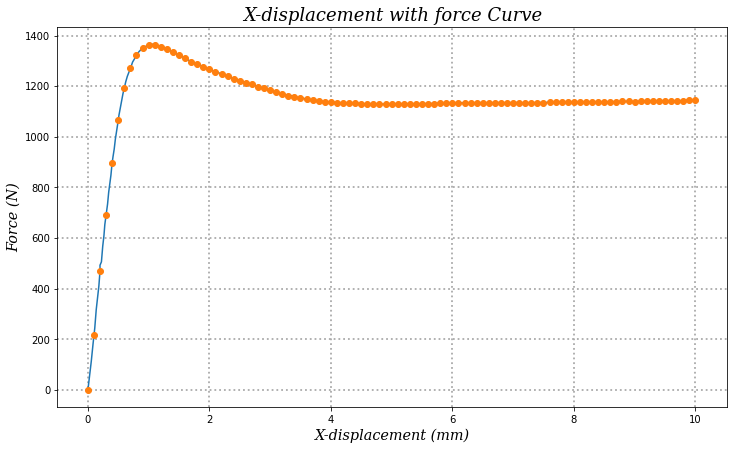

In [ ]:
#force.plot(x="length", y="force")
plt.figure(figsize=(12,7))                                  # In this example, all the plots will be in one figure. 
x1 = x131dis-x60dis
y1 = final_array[0,:,2]
xnew= np.arange(0,10.1,0.1)
ynew= xyfor[0,:,2]
plt.plot(x1, y1, '-', xnew, ynew, 'o')
plt.title('X-displacement with force Curve',family='serif', style='italic' ,fontsize=18)
plt.xlabel('X-displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
plt.ylabel('Force (N)',family='serif', style='italic' ,fontsize='x-large')
plt.grid( ls=':', color='#AAAAAA', linewidth=1.8 )

In [ ]:
np.save("test_data_daniel_MirijamCubic.npz.npy", xyfor)

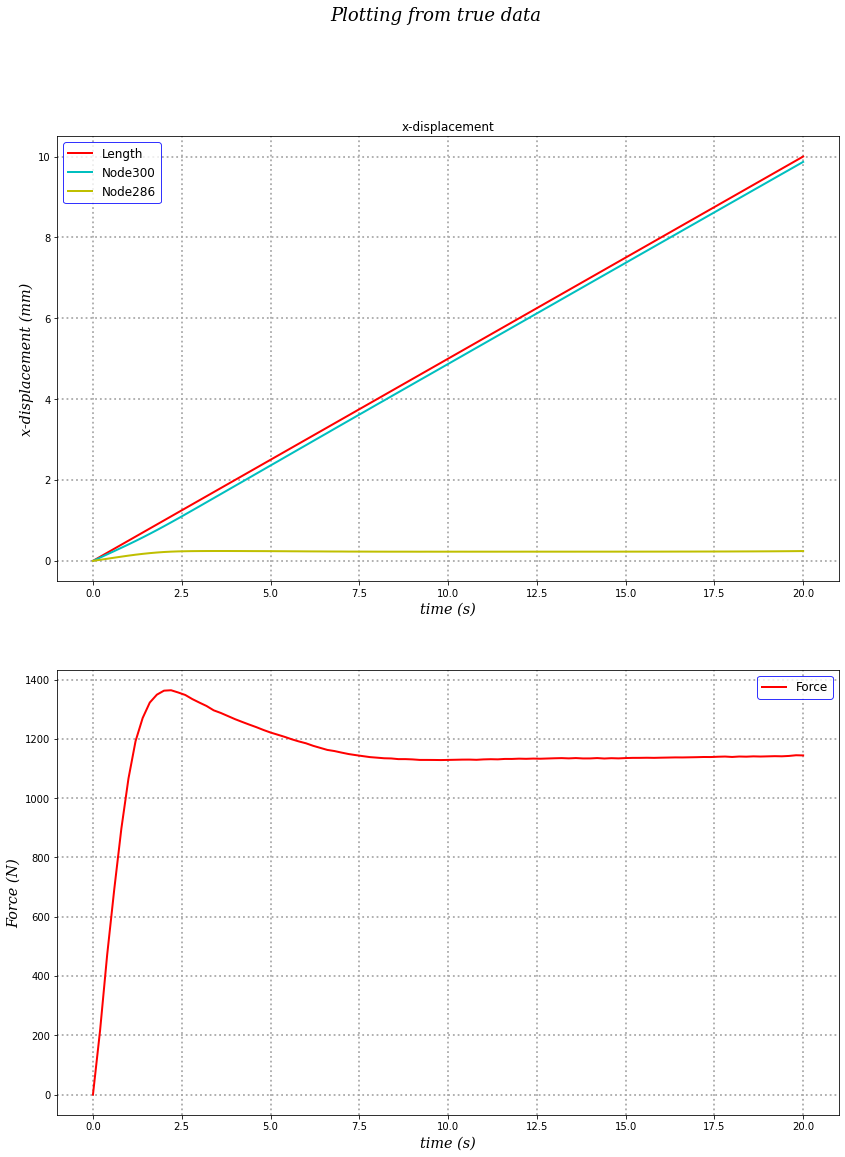

In [ ]:
#Plotting from true Experement
fig, axes = plt.subplots( 2,1,figsize=(14,18))    # In this example, all the plots will be in one figure. 
fig.suptitle('Plotting from true data',family='serif', style='italic' ,fontsize=18)

x = np.arange(0.0,20.2,0.2)
y1 = xyfor[135,:,0]       # node 300 
y2 = xyfor[121,:,0]       # node 286
#y3 = xyfor[156,:,0]       # node 346
#y4 = xyfor[138,:,0]       # node 318 ( must be close to 0)
force  = xyfor[138,:,2]
length = np.arange(0.0,10.1,0.1)
#dif    = y3-y4
axes[0].plot(x,length,linewidth=2,c='r',label='Length')
axes[0].plot(x,y1,linewidth=2,c='c',label='Node300')
axes[0].plot(x,y2,linewidth=2,c='y',label='Node286')
#axes[0].plot(x,y3,linewidth=2,c='k',label='Point 1')
#axes[0].plot(x,y4,linewidth=2,c='b',label='Point 2')
#axes[0].plot(x,dif,linewidth=2,c='g',label='Point1--Point2')
axes[0].set_ylabel('x-displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
axes[0].set_xlabel('time (s)',family='serif', style='italic' ,fontsize='x-large')
axes[0].grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[0].set_title('x-displacement')
axes[0].legend(edgecolor='blue' , fontsize='large')

axes[1].plot(x,force,linewidth=2,c='r', label='Force')
axes[1].set_xlabel('time (s)',family='serif', style='italic' ,fontsize='x-large')
axes[1].set_ylabel('Force (N)',family='serif', style='italic' ,fontsize='x-large')
axes[1].grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[1].legend(edgecolor='blue' , fontsize='large')
#axes[1].set_title('Force')

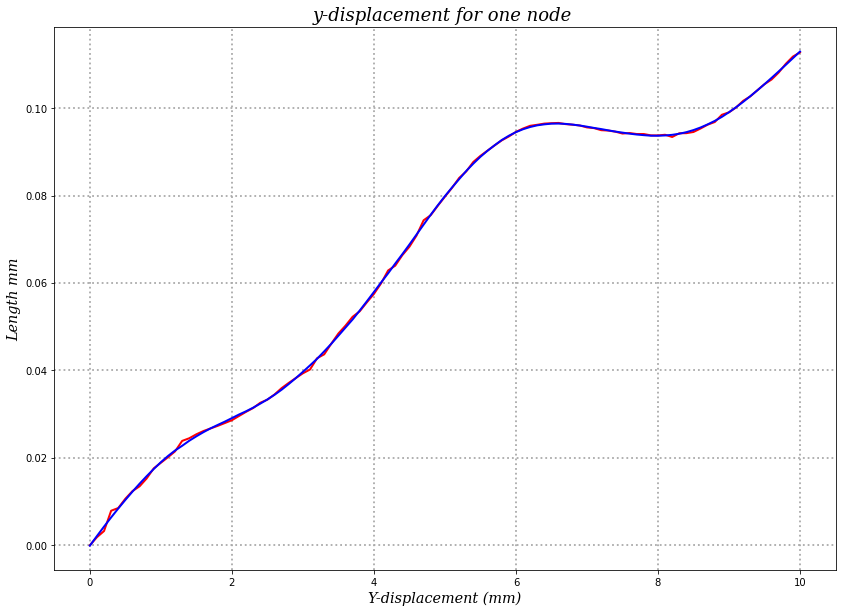

In [ ]:
from scipy.signal import savgol_filter

#Plotting filtering
plt.figure( figsize=(14,10))    # In this example, all the plots will be in one figure. 
fig.suptitle('Plotting for filtering ',family='serif', style='italic' ,fontsize=18)

x = np.arange(0.0,10.1,0.1)
y1 = xyfor[128,:,1]
yfilter = savgol_filter(y1, 21, 3)

plt.plot(x, y1,linewidth=2,c='r',label='without filter')
plt.plot(x, yfilter,linewidth=2,c='b',label='with filter')      # high frequency noise removed
plt.title('y-displacement for one node ',family='serif', style='italic' ,fontsize=18)
plt.xlabel('Y-displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
plt.ylabel('Length mm',family='serif', style='italic' ,fontsize='x-large')
plt.grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[1].legend(edgecolor='blue' , fontsize='large')
#print(yfilter)

In [ ]:
x = np.arange(0.0,10.1,0.1)
ydisfilter = []
xdisfilter = []
for i in range(272):
  xdis = xyfor[i,:,0]
  ydis = xyfor[i,:,1]
  xfilter = savgol_filter(xdis, 21,3)
  yfilter = savgol_filter(ydis, 21,3)
  xdisfilter.append(xfilter) 
  ydisfilter.append(yfilter)

xdisfilter = np.array(xdisfilter)
ydisfilter = np.array(ydisfilter)
for i in range(272):
   if xdisfilter[i,0]   !=  xyfor[i,0,0]:
      xdisfilter[i,0]    =  0                            #xyfor[i,0,0]
   #if xdisfilter[i,1]   !=  xyfor[i,1,0]:
      #xdisfilter[i,1]    =  xyfor[i,1,0]
   #if xdisfilter[i,2]   !=  xyfor[i,2,0]:
      #xdisfilter[i,2]    =  xyfor[i,2,0]
   #if xdisfilter[i,3]   !=  xyfor[i,3,0]:
      #xdisfilter[i,3]    =  xyfor[i,3,0]
   #if xdisfilter[i,100] !=  xyfor[i,100,0]:
      #xdisfilter[i,100]  =  xyfor[i,100,0]

   #if ydisfilter[i,0]   !=  xyfor[i,0,1]:
      #ydisfilter[i,0]    =  0                            #xyfor[i,0,1]
   #if ydisfilter[i,1]   !=  xyfor[i,1,1]:
      #ydisfilter[i,1]    =  xyfor[i,1,1]
   #if ydisfilter[i,2]   !=  xyfor[i,2,1]:
      #ydisfilter[i,2]    =  xyfor[i,2,1]
   #if ydisfilter[i,3]   !=  xyfor[i,3,1]:
      #ydisfilter[i,3]    =  xyfor[i,3,1]
   #if ydisfilter[i,100] !=  xyfor[i,100,1]:
      #ydisfilter[i,100]  =  xyfor[i,100,1]

print(xdisfilter.shape)
print(ydisfilter.shape)
#print(xdisfilter[0,:])
#print(ydisfilter[0,:])

(272, 101)
(272, 101)


In [ ]:
xyforfilter = np.stack((xdisfilter,ydisfilter,xfor),2)
#xyfor1 = np.stack((xdisscaled,ydisscaled),3)
print(xyforfilter.shape)
#print(xyforfilter)

(272, 101, 3)


In [ ]:
np.save("test_data_daniel_Mirijamfiltercubic.npz.npy", xyforfilter)

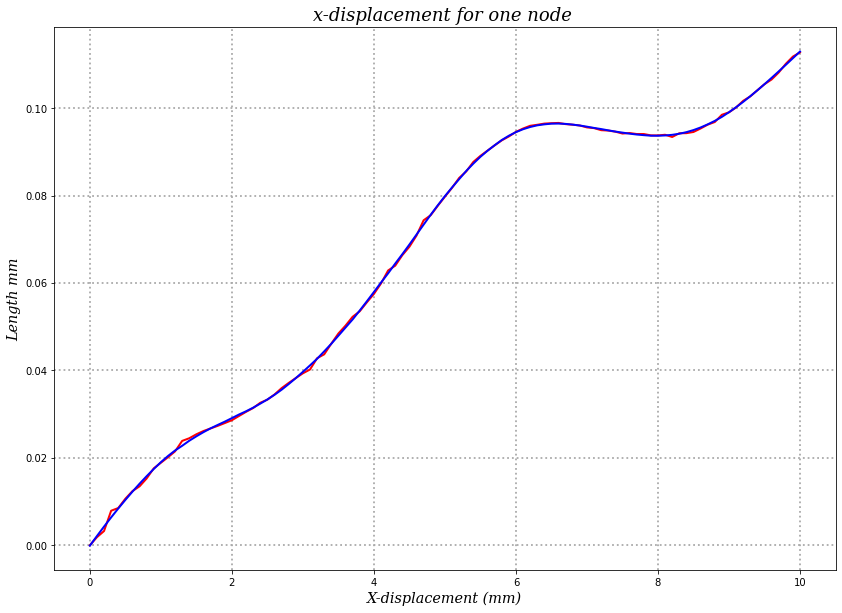

In [ ]:
#Plotting filtering
plt.figure( figsize=(14,10))    # In this example, all the plots will be in one figure. 
fig.suptitle('Plotting for filtering ',family='serif', style='italic' ,fontsize=18)

x = np.arange(0.0,10.1,0.1)
y1 = xyfor[128,:,1]
yfilter = xyforfilter[128,:,1]

plt.plot(x, y1,linewidth=2,c='r',label='without filter')
plt.plot(x, yfilter,linewidth=2,c='b',label='with filter')      # high frequency noise removed
plt.title('Y-displacement for one node ',family='serif', style='italic' ,fontsize=18)
plt.xlabel('y-displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
plt.ylabel('Length mm',family='serif', style='italic' ,fontsize='x-large')
plt.grid( ls=':', color='#AAAAAA', linewidth=1.8 )
axes[1].legend(edgecolor='blue' , fontsize='large')
#print(yfilter)